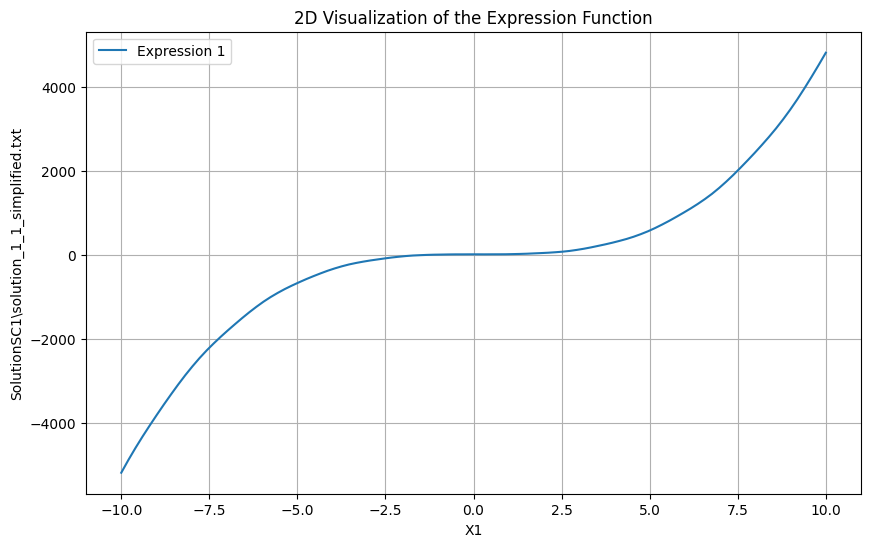

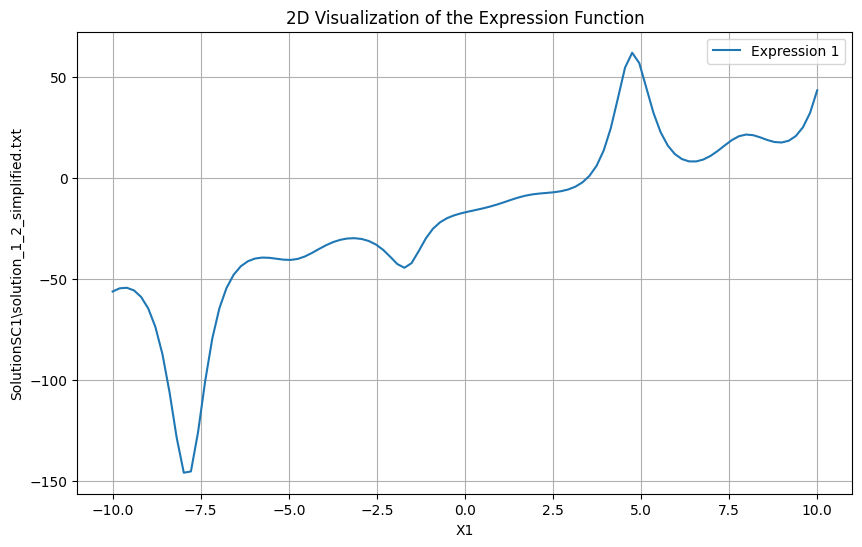

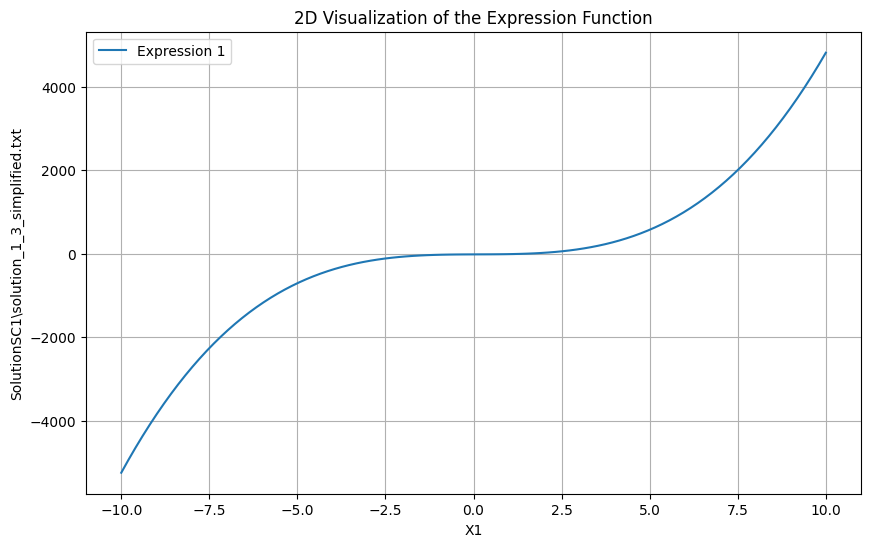

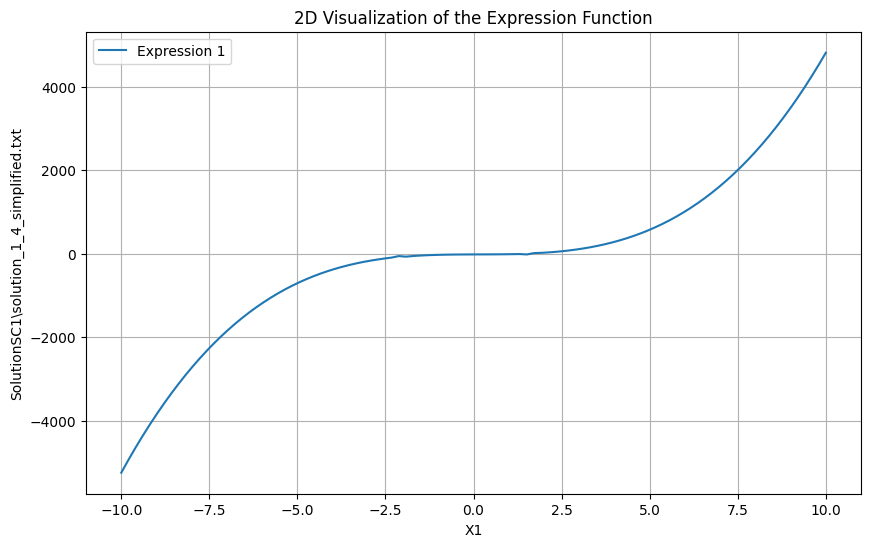

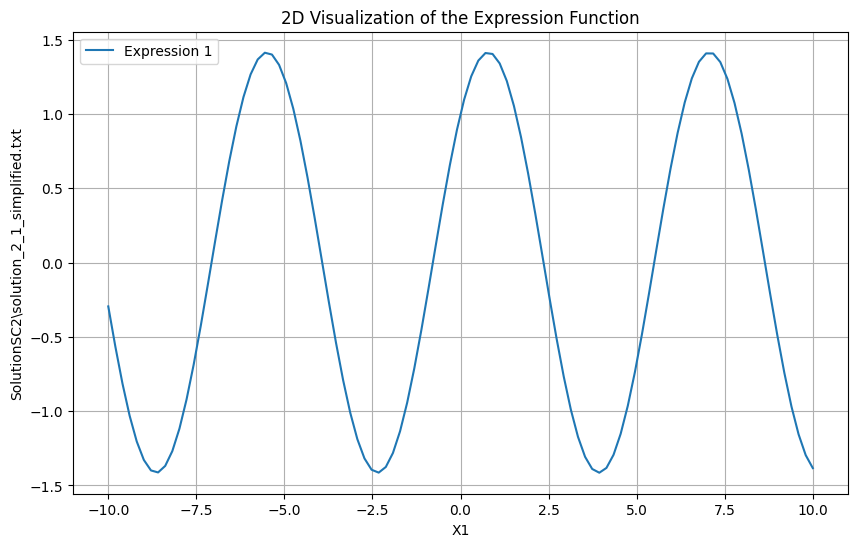

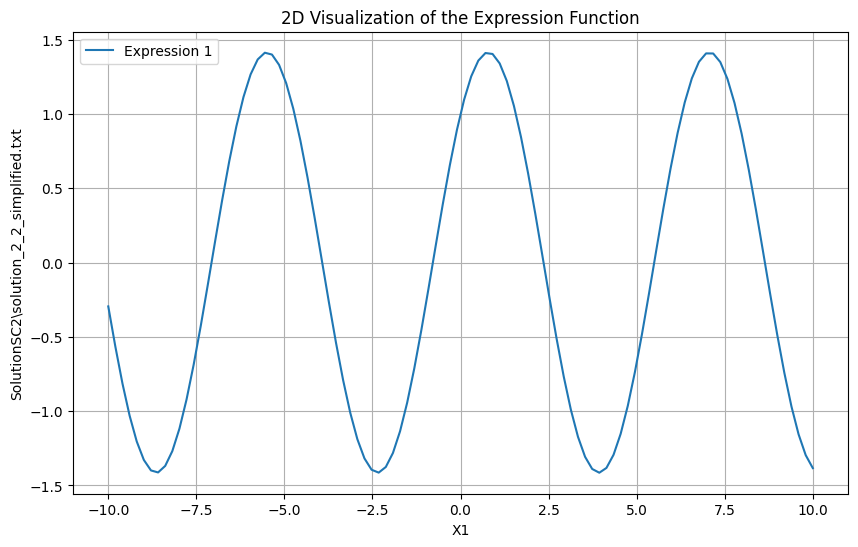

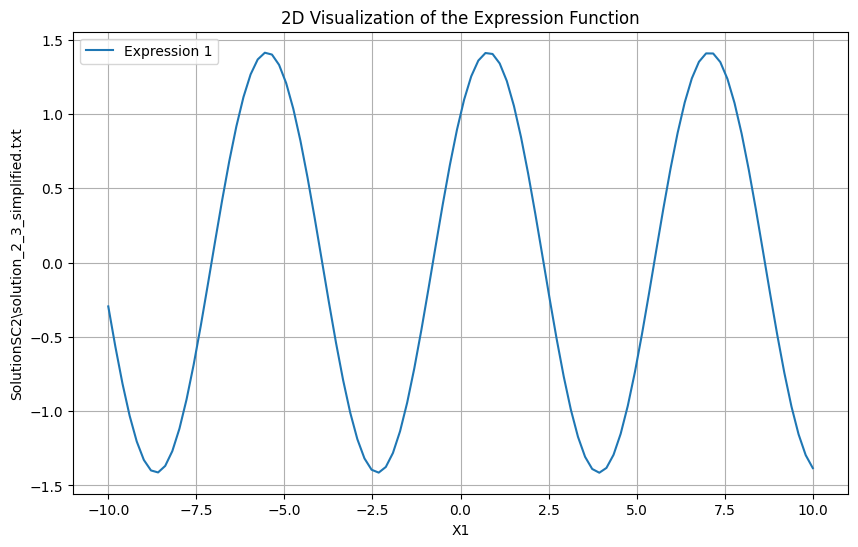

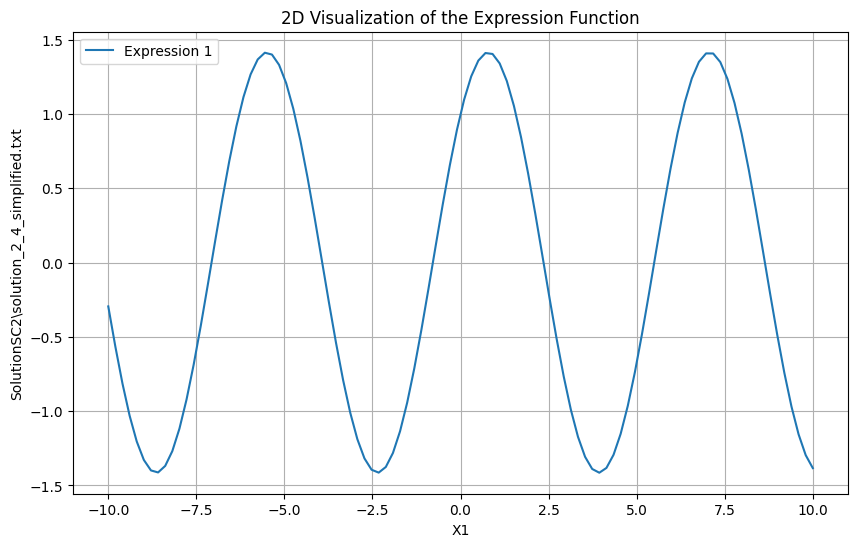

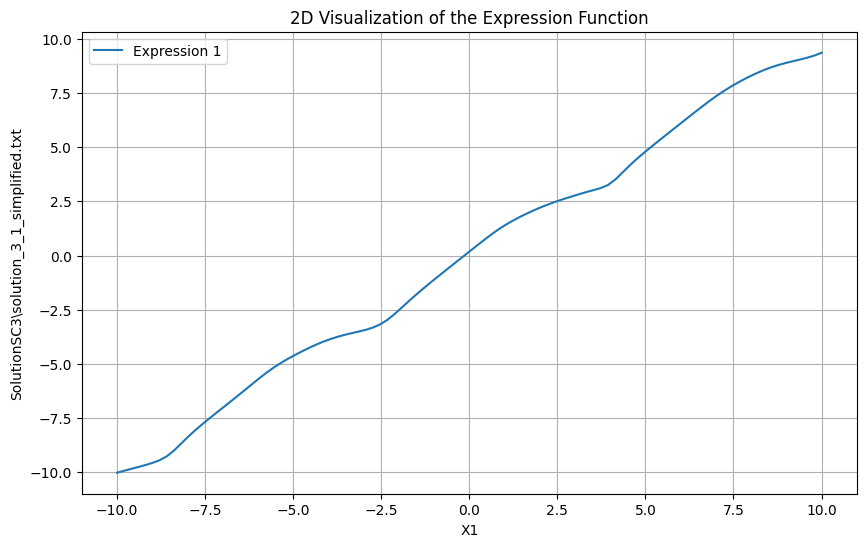

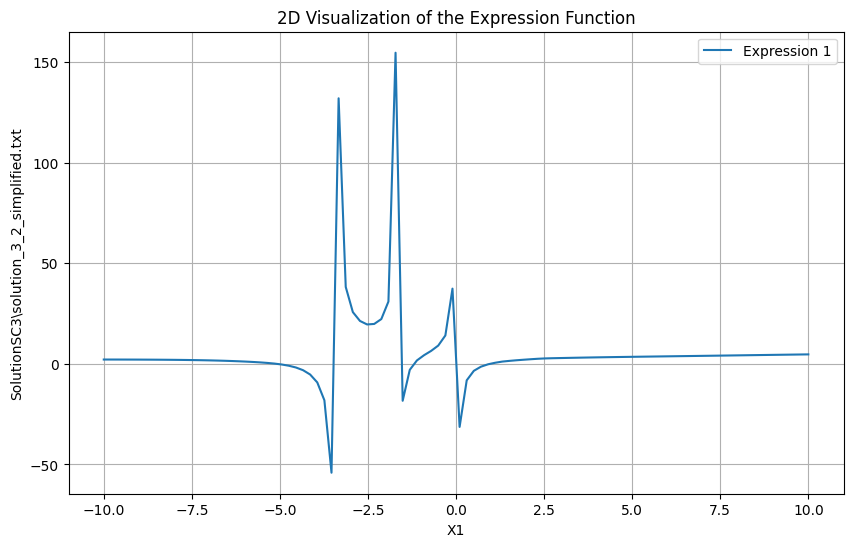

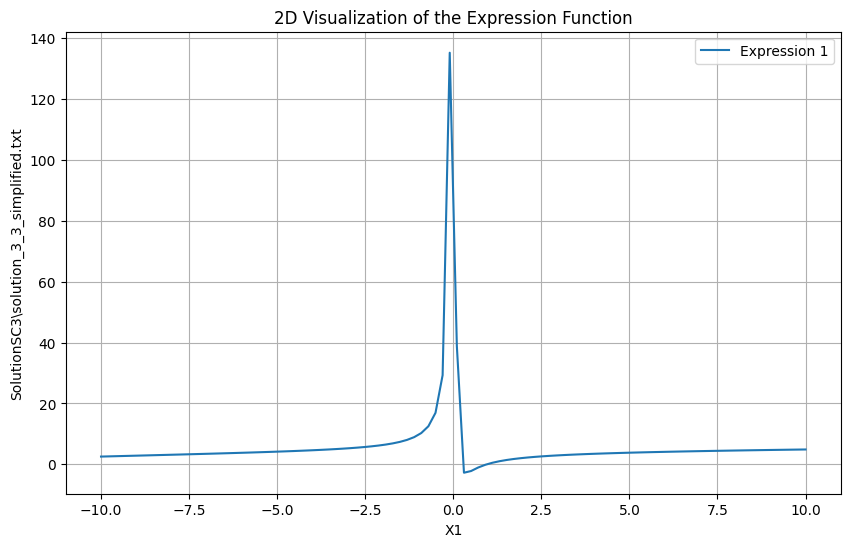

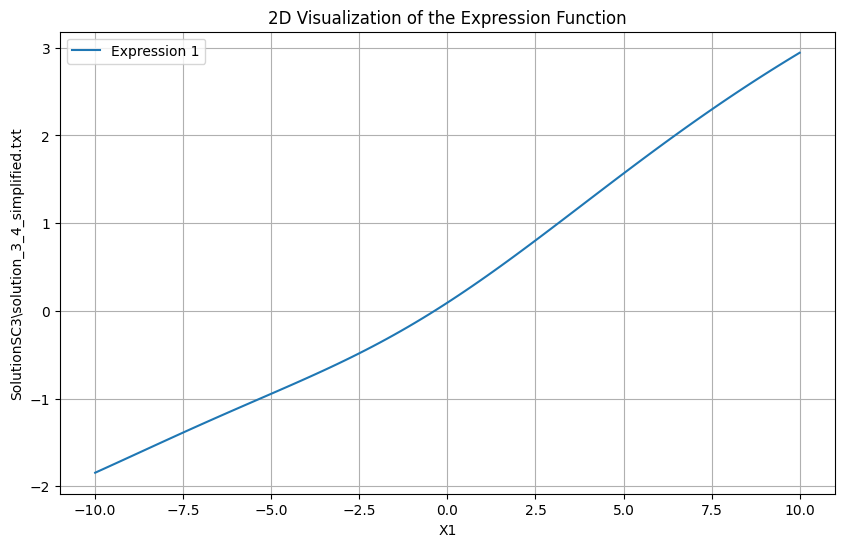

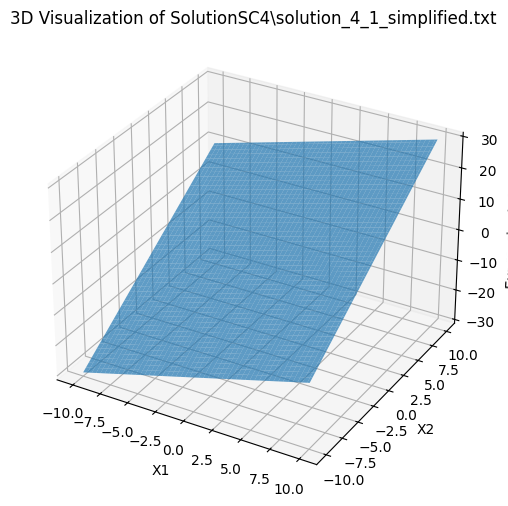

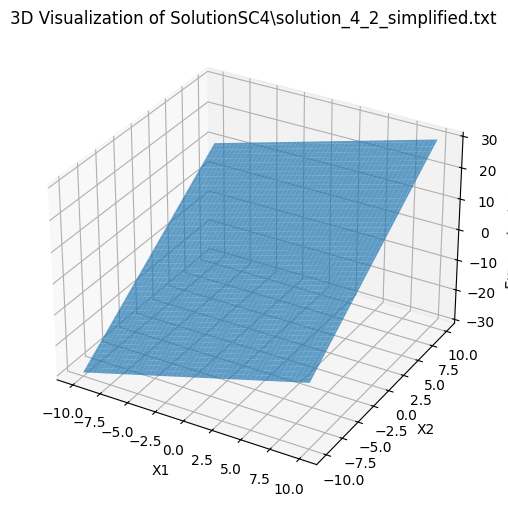

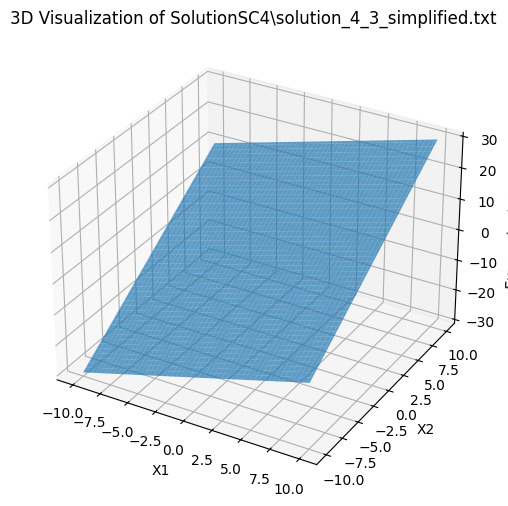

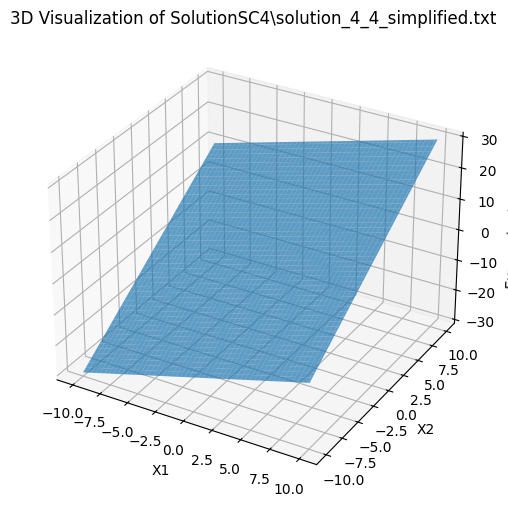

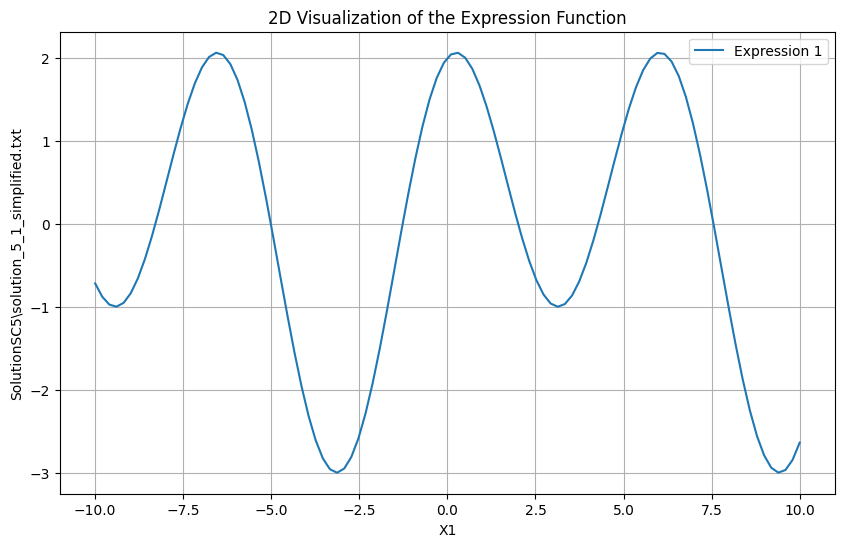

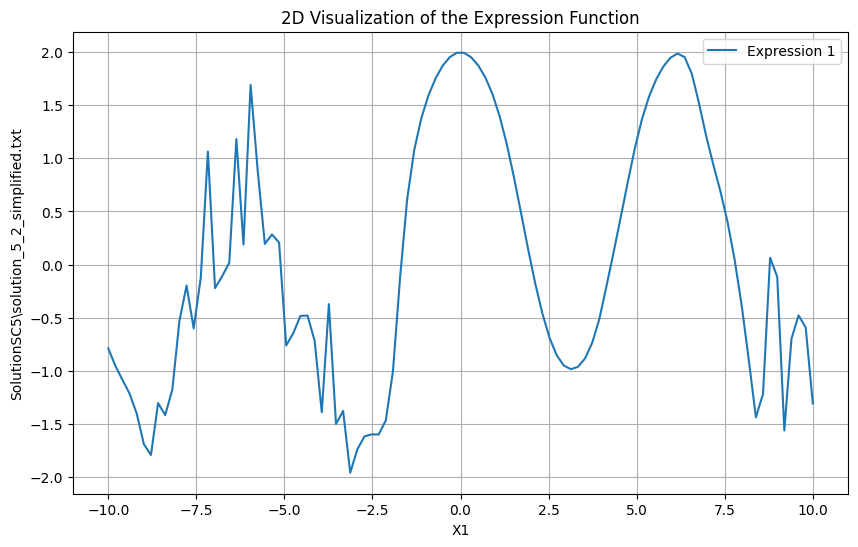

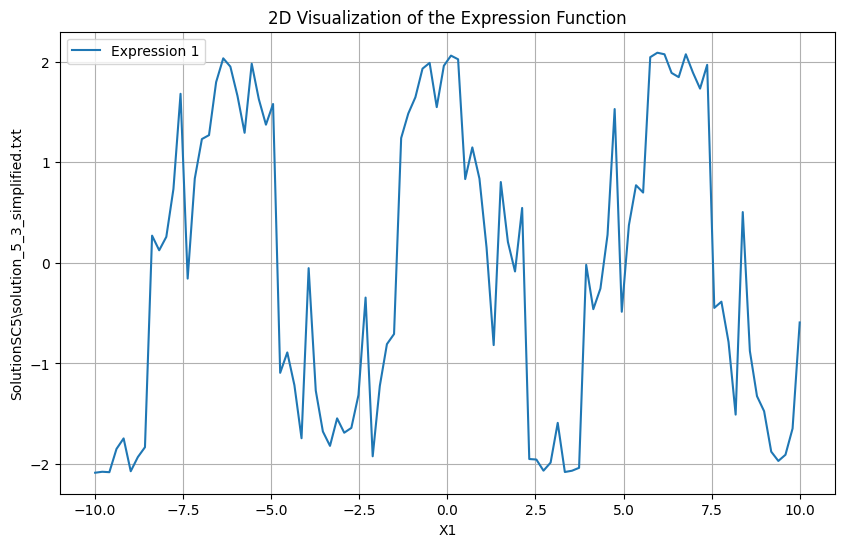

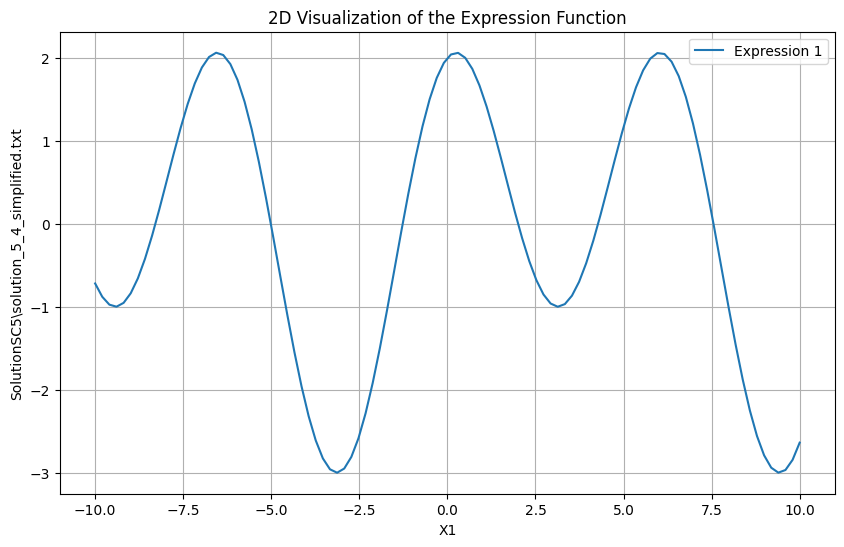

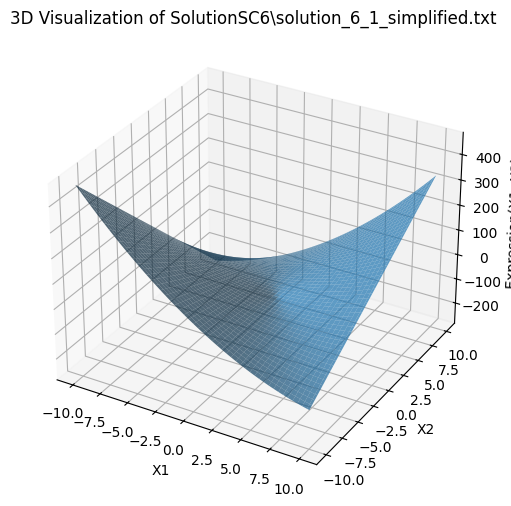

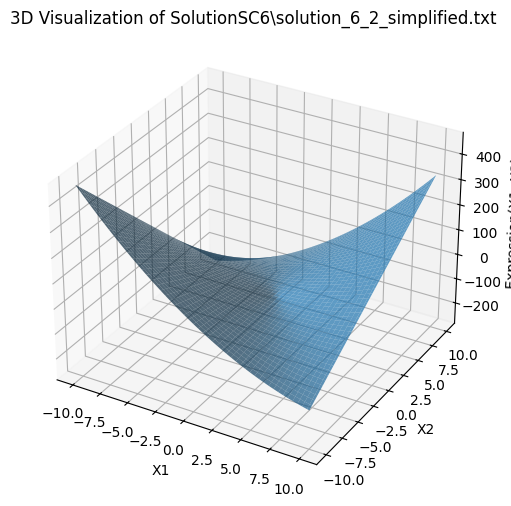

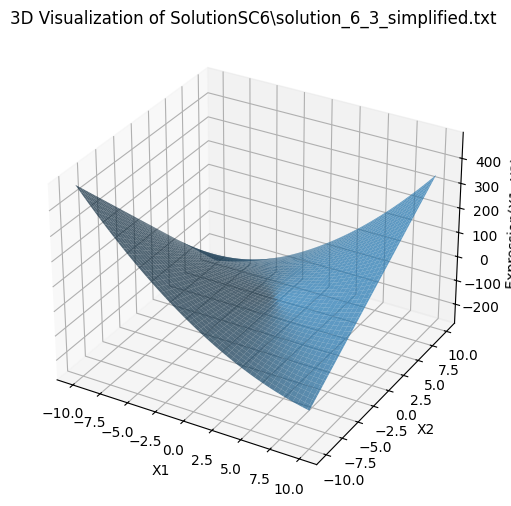

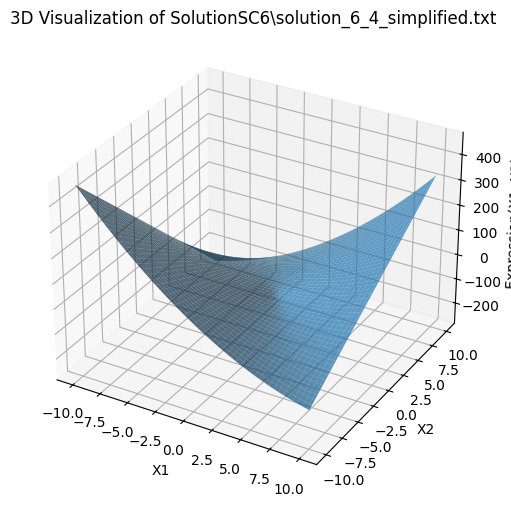

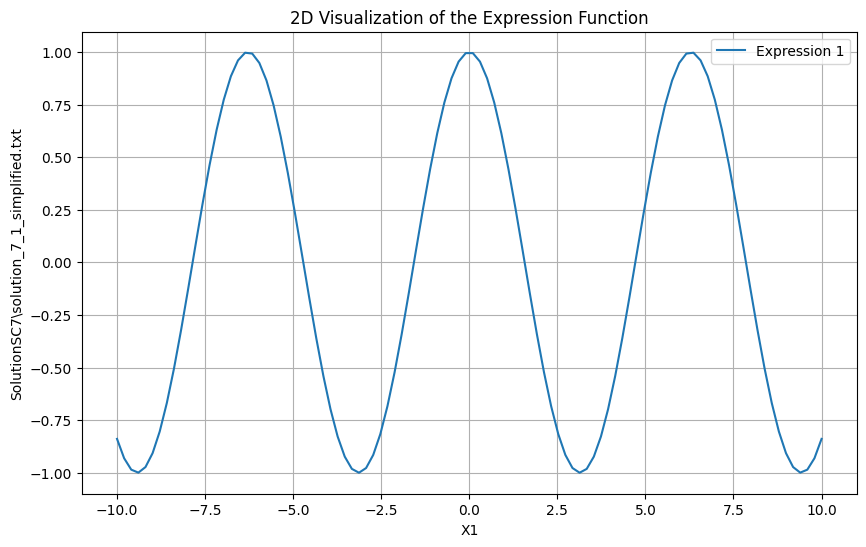

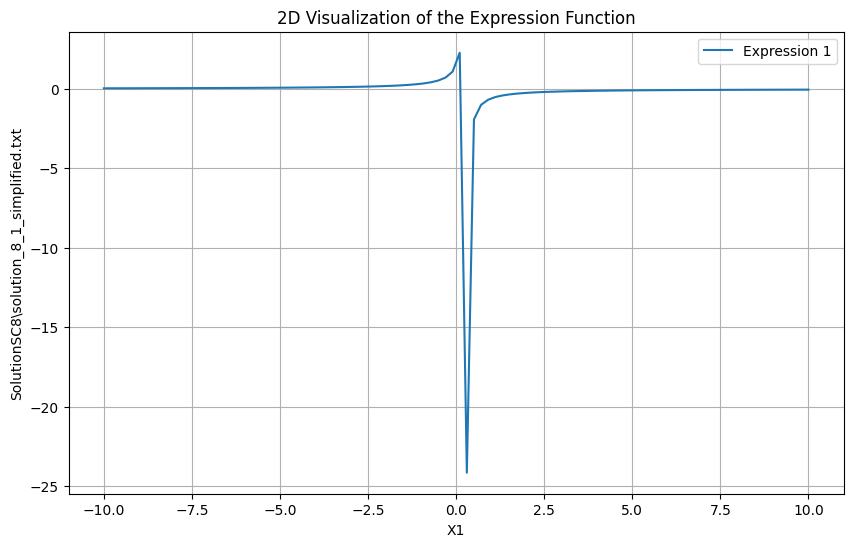

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

def load_and_evaluate_expression(expression_str, x_values, y_values=None):
    try:
        X1, X2 = sp.symbols('X1 X2')
        
        sympy_expr = sp.sympify(expression_str)
        
        symbols_in_expr = sympy_expr.free_symbols
        substitutions = {}
        for symbol in symbols_in_expr:
            if symbol not in {X1, X2}:
                substitutions[symbol] = 0
        
        sympy_expr = sympy_expr.subs(substitutions)
        
        if y_values is not None:
            expr_func = sp.lambdify((X1, X2), sympy_expr, 'numpy')
            X1_vals, X2_vals = np.meshgrid(x_values, y_values)
            return X1_vals, X2_vals, expr_func(X1_vals, X2_vals)
        else:
            expr_func = sp.lambdify(X1, sympy_expr, 'numpy')
            return expr_func(x_values)
    except Exception as e:
        print(f"Error evaluating expression: {e}")
        return None

X = np.linspace(-10, 10, 100)

def read_and_plot(path, is_3d=False):
    y_values = []
    try:
        with open(path, 'r') as file:
            for line in file:
                expression_str = line.strip()
                if is_3d:
                    X2 = np.linspace(-10, 10, 100)
                    X1_vals, X2_vals, Z_vals = load_and_evaluate_expression(expression_str, X, X2)
                    if Z_vals is not None:
                        y_values.append((X1_vals, X2_vals, Z_vals))
                else:
                    y = load_and_evaluate_expression(expression_str, X)
                    if y is not None:
                        y_values.append(y)
    except FileNotFoundError:
        print(f"File {path} not found.")
        return False

    if y_values:
        fig = plt.figure(figsize=(10, 6))
        if is_3d:
            ax = fig.add_subplot(111, projection='3d')
            for idx, (X1_vals, X2_vals, Z_vals) in enumerate(y_values):
                ax.plot_surface(X1_vals, X2_vals, Z_vals, label=f'Expression {idx + 1}', alpha=0.7)
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Expression(X1, X2)')
            plt.title(f'3D Visualization of {path}')
        else:
            for idx, y in enumerate(y_values):
                plt.plot(X, y, label=f'Expression {idx + 1}')
            plt.xlabel('X1')
            plt.ylabel(f'{path}')
            plt.title('2D Visualization of the Expression Function')
            plt.legend()
        plt.grid(True)
        plt.show()
    return True

for folder_num in range(1, 7):
    folder_name = f"SolutionSC{folder_num}"
    
    is_3d = folder_num in {4, 6}
    
    for i in range(1, 5):  
        file_name = f"solution_{folder_num}_{i}_simplified.txt"            
        full_path = os.path.join(folder_name, file_name)            
        read_and_plot(full_path, is_3d)

for folder_num in range(7, 9):
    folder_name = f"SolutionSC{folder_num}"
    
    is_3d = folder_num in {4, 6}
    
    file_name = f"solution_{folder_num}_1_simplified.txt"            
    full_path = os.path.join(folder_name, file_name)            
    read_and_plot(full_path, is_3d)
    
